### Mini Project: Boston Housing Dataset

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.datasets import load_boston || `load_boston` has been removed from scikit-learn since version 1.2. 

## Part 1:

In [36]:
boston_df = pd.read_csv('BostonHousing.csv')

In [37]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [39]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


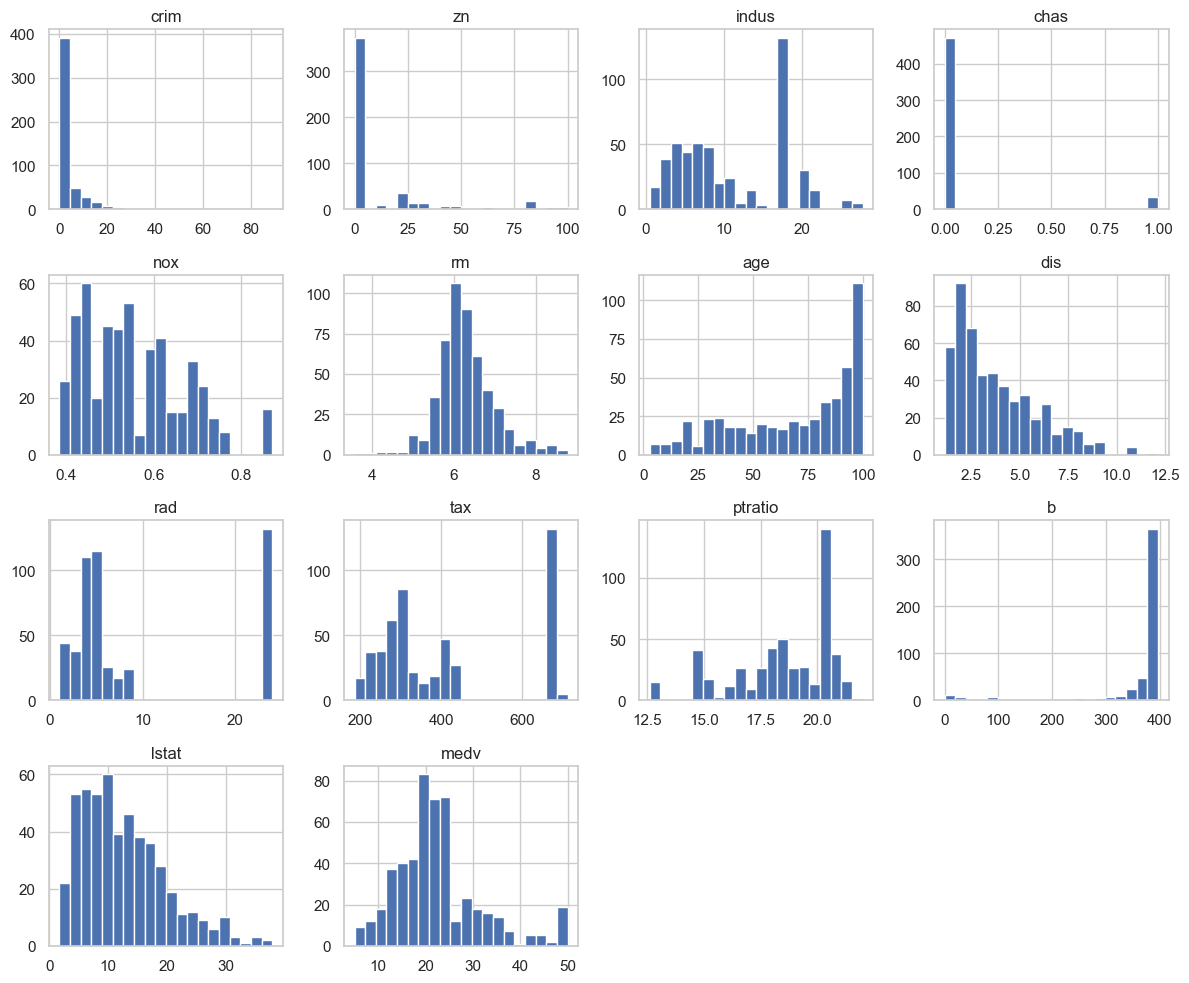

In [40]:
sb.set(style = 'whitegrid')

boston_df.hist(bins=20, figsize=(12,10))
pl.tight_layout()

C:\Users\danik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\danik\AppData\Local\Temp\ipykernel_15248\2394089929.py:2: UserWarning: The figure layout has changed to tight
  pl.tight_layout()


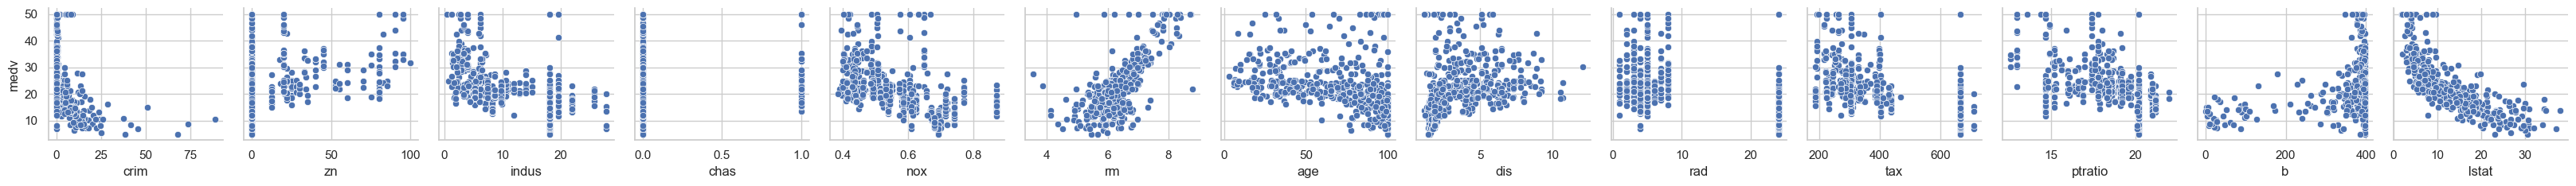

In [41]:
sb.pairplot(boston_df, x_vars = boston_df.columns.drop('medv'), y_vars='medv', kind='scatter')
pl.tight_layout()

In [42]:
missing_data = boston_df.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [43]:
scaler = MinMaxScaler()
continuous_columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
boston_df[continuous_columns] = scaler.fit_transform(boston_df[continuous_columns])

print("\nPreprocessed Data:")
print(boston_df.head())


Preprocessed Data:
       crim    zn     indus  chas       nox        rm       age       dis  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        rad       tax   ptratio         b     lstat      medv  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000  0.099338  0.693333  


In [44]:
boston_df['age'] = pd.to_numeric(boston_df['age'], errors='coerce')

age_bins = [0, 30, 60, 100]
age_labels = ['new', 'old', 'very old']
boston_df['age_category'] = pd.cut(boston_df['age'], bins=age_bins, labels=age_labels)

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_age = encoder.fit_transform(boston_df[['age_category']])
encoded_age_df = pd.DataFrame(encoded_age, columns=encoder.get_feature_names_out(['age_category']))
boston_df = pd.concat([boston_df, encoded_age_df], axis=1)

print(boston_df.head())

       crim    zn     indus  chas       nox        rm       age       dis  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        rad       tax   ptratio         b     lstat      medv age_category  \
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222          new   
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889          new   
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000          new   
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111          new   
4  0.086957  0.066794  0.648936  1.000000  0.099338  0.693333          new   

   age_category_nan  
0               0.0  
1               0.0  
2 

In [56]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,b,lstat,medv,age_category,age_category_nan,age_new,age_old,age_very old
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,new,0.0,True,False,False
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,new,0.0,True,False,False
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,new,0.0,True,False,False
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,new,0.0,True,False,False
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,new,0.0,True,False,False


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

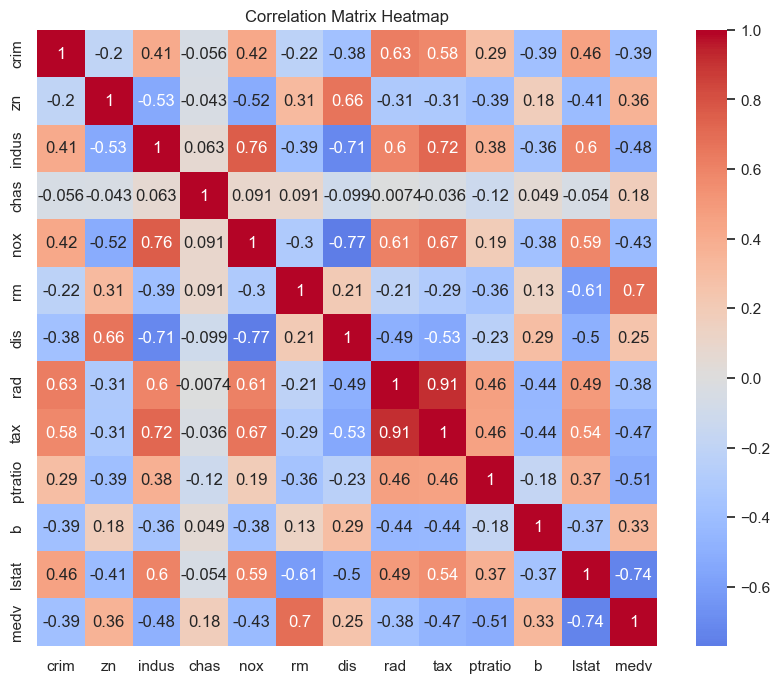

In [57]:
continuous_columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

correlation_matrix = boston_df[continuous_columns].corr()

pl.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
pl.title('Correlation Matrix Heatmap')


In [59]:
boston_df['new_feature'] = boston_df['rm'] * boston_df['lstat']
boston_df.head()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,b,lstat,medv,age_category,age_category_nan,age_new,age_old,age_very old,new_feature
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,new,0.0,True,False,False,0.051791
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,new,0.0,True,False,False,0.112049
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,new,0.0,True,False,False,0.044070
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,new,0.0,True,False,False,0.021988
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,new,0.0,True,False,False,0.068255


## Part 2:

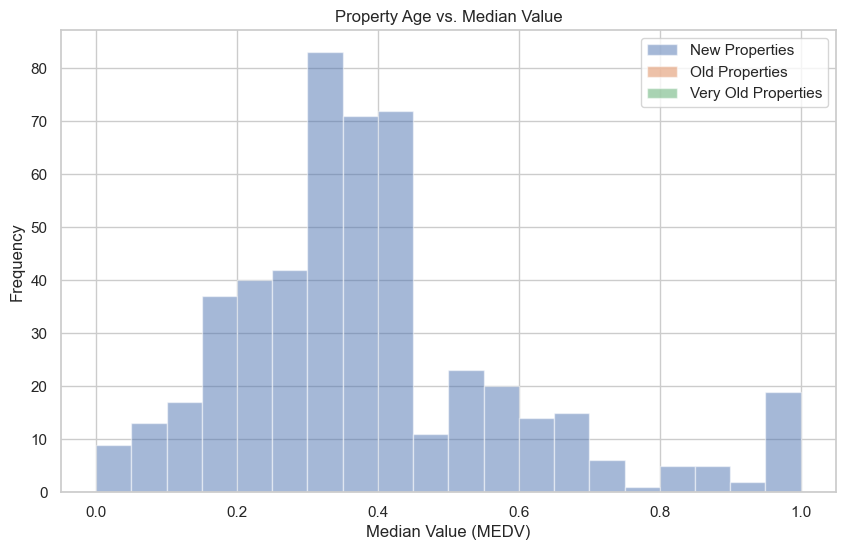

In [61]:
new_properties = boston_df[boston_df['age_category'] == 'new']
old_properties = boston_df[boston_df['age_category'] == 'old']
very_old_properties = boston_df[boston_df['age_category'] == 'very old']

pl.figure(figsize=(10, 6))

pl.hist(new_properties['medv'], bins=20, alpha=0.5, label='New Properties')
pl.hist(old_properties['medv'], bins=20, alpha=0.5, label='Old Properties')
pl.hist(very_old_properties['medv'], bins=20, alpha=0.5, label='Very Old Properties')

pl.xlabel('Median Value (MEDV)')
pl.ylabel('Frequency')
pl.title('Property Age vs. Median Value')
pl.legend()

## Part 3:

Text(0.5, 1.0, 'Neighborhood Crime Rate Impact on Prices')

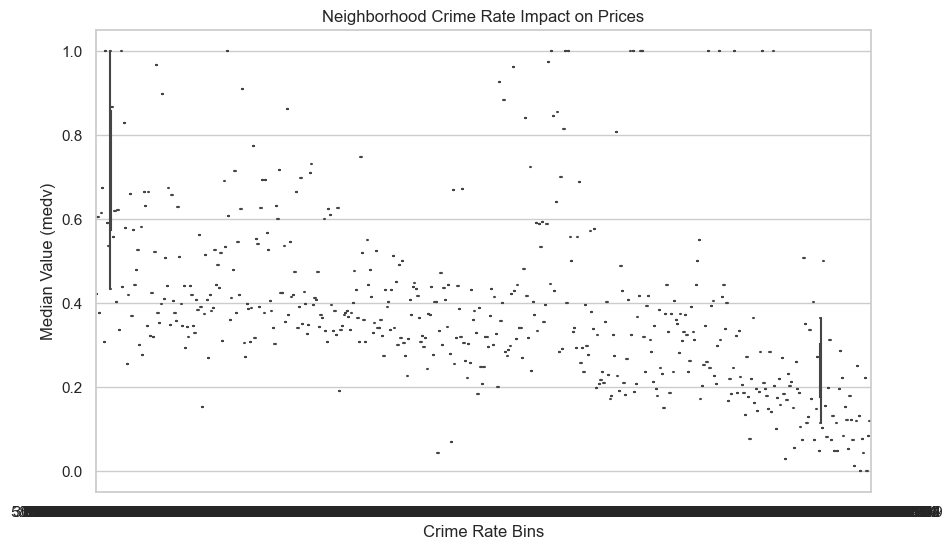

In [65]:
pl.figure(figsize=(10, 6))

sb.boxplot(x='crim', y='medv', data=boston_df)
pl.xlabel('Crime Rate Bins')
pl.ylabel('Median Value (medv)')
pl.title('Neighborhood Crime Rate Impact on Prices')

In [66]:
avg_MEDV_per_CRIM_BIN = boston_df.groupby('crim')['medv'].mean()
print(avg_MEDV_per_CRIM_BIN)


crim
0.000000    0.422222
0.000031    0.604444
0.000052    0.377778
0.000075    0.615556
0.000076    0.675556
              ...   
0.514104    0.044444
0.574683    0.222222
0.763342    0.000000
0.826435    0.084444
1.000000    0.120000
Name: medv, Length: 504, dtype: float64


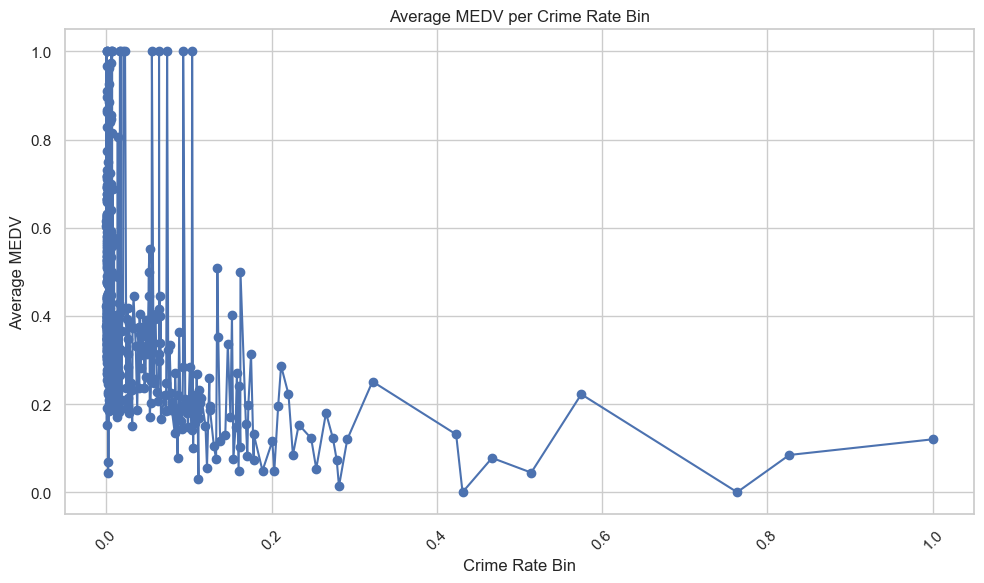

In [67]:
pl.figure(figsize=(10, 6))
avg_MEDV_per_CRIM_BIN.plot(kind='line', marker='o')
pl.xlabel('Crime Rate Bin')
pl.ylabel('Average MEDV')
pl.title('Average MEDV per Crime Rate Bin')
pl.grid(True)
pl.xticks(rotation=45)
pl.tight_layout()